In [161]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from cProfile import label
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import powerlaw as pl

%matplotlib inline

In [162]:
def plot_degree_dist(G):
    
    degrees = [G.degree(n, weight = 'weight') for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    print(bin_edges)
    print(density)
    
    fig = plt.figure(figsize=(20,20))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    fit = pl.Fit(degrees, xmin=min(degrees), xmax=max(degrees))
    print('gamma= ',fit.power_law.alpha)
    fit.power_law.plot_pdf(color='black')
    
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [163]:
df = pd.read_csv('../data/fulldata-name.csv', header=0)
df = df[df['Importer reported quantity'].notnull()]
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc

taxons = {}
purpose = {}
       
for index, row in df.iterrows():
    if(row['Taxon'] not in taxons):
        purpose = {}
    
    if(row['Purpose'] == "B"):
        purposeCode = "Breeding"
    if(row['Purpose'] == "E"):
        purposeCode = "Educational"
    if(row['Purpose'] == "G"):
        purposeCode = "Garden"
    if(row['Purpose'] == "H"):
        purposeCode = "Hunting"
    if(row['Purpose'] == "L"):
        purposeCode = "Law"
    if(row['Purpose'] == "M"):
        purposeCode = "Medical"
    if(row['Purpose'] == "R"):
        purposeCode = "Reintroduction to wild"
    if(row['Purpose'] == "P"):
        purposeCode = "Personal"
    if(row['Purpose'] == "Q"):
        purposeCode = "Circus"
    if(row['Purpose'] == "S"):
        purposeCode = "Scientific"
    if(row['Purpose'] == "T"):
        purposeCode = "Commercial"
    if(row['Purpose'] == "Z"):
        purposeCode = "Zoo"
    if(row['Purpose'] == "Unspecified"):
        purposeCode = "Unspecified"
        
    # purposeDetails = {purposeCode: "X"}
        
    # purpose.update(purposeDetails)
    # attributes = {"Purpose": purpose}

    # taxons.update({row['Taxon']: row['Taxon']})
    # G.add_node(row['Importer'], **attributes)
    
    if G.has_node(row['Importer']):
        if purposeCode not in G.nodes[row['Importer']]['purpose']:  
            G.nodes[row['Importer']]['purpose'].append(purposeCode)
    else:
        purpose = [purposeCode]
        G.add_node(row['Importer'], purpose = [purposeCode])

df2 = df.drop_duplicates(['Taxon', 'Importer'])
for i, group in df2.groupby(['Taxon'])['Importer']: #https://stackoverflow.com/questions/35089255/pandas-reshape-dataframe-to-edge-list-according-to-column-values
    # generate all combinations without replacement 
    # from the group of similar column pairs
    for u, v in itertools.combinations(group, 2):
        if(G.has_edge(u,v)):
            G[u][v]['weight'] += 1
        else:
            G.add_edge(u, v, weight = 1, taxon = [i])

nx.write_gml(G,"importer-importer-taxon.gml")


Number of nodes:  110
Number of edges:  3572

Weighted average degree: 758.2181818181818
Minimum degree:  1
Maximum degree:  4066

[1.00000000e+00 1.74818648e+00 3.05615596e+00 5.34273052e+00
 9.34008925e+00 1.63282177e+01 2.85447694e+01 4.99015799e+01
 8.72372672e+01 1.52507011e+02 2.66610694e+02 4.66085210e+02
 8.14803861e+02 1.42442909e+03 2.49016768e+03 4.35327746e+03
 7.61034079e+03 1.33042949e+04 2.32583884e+04 4.06600000e+04]
[4.86023705e-02 6.95039847e-03 0.00000000e+00 0.00000000e+00
 7.80544530e-03 1.48829380e-03 2.97967544e-03 3.16538483e-03
 1.39282133e-03 7.96723544e-04 5.92465747e-04 2.60694662e-04
 1.64035205e-04 1.10891939e-04 4.87942749e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
gamma=  1.1839553383962156


c:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /
c:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


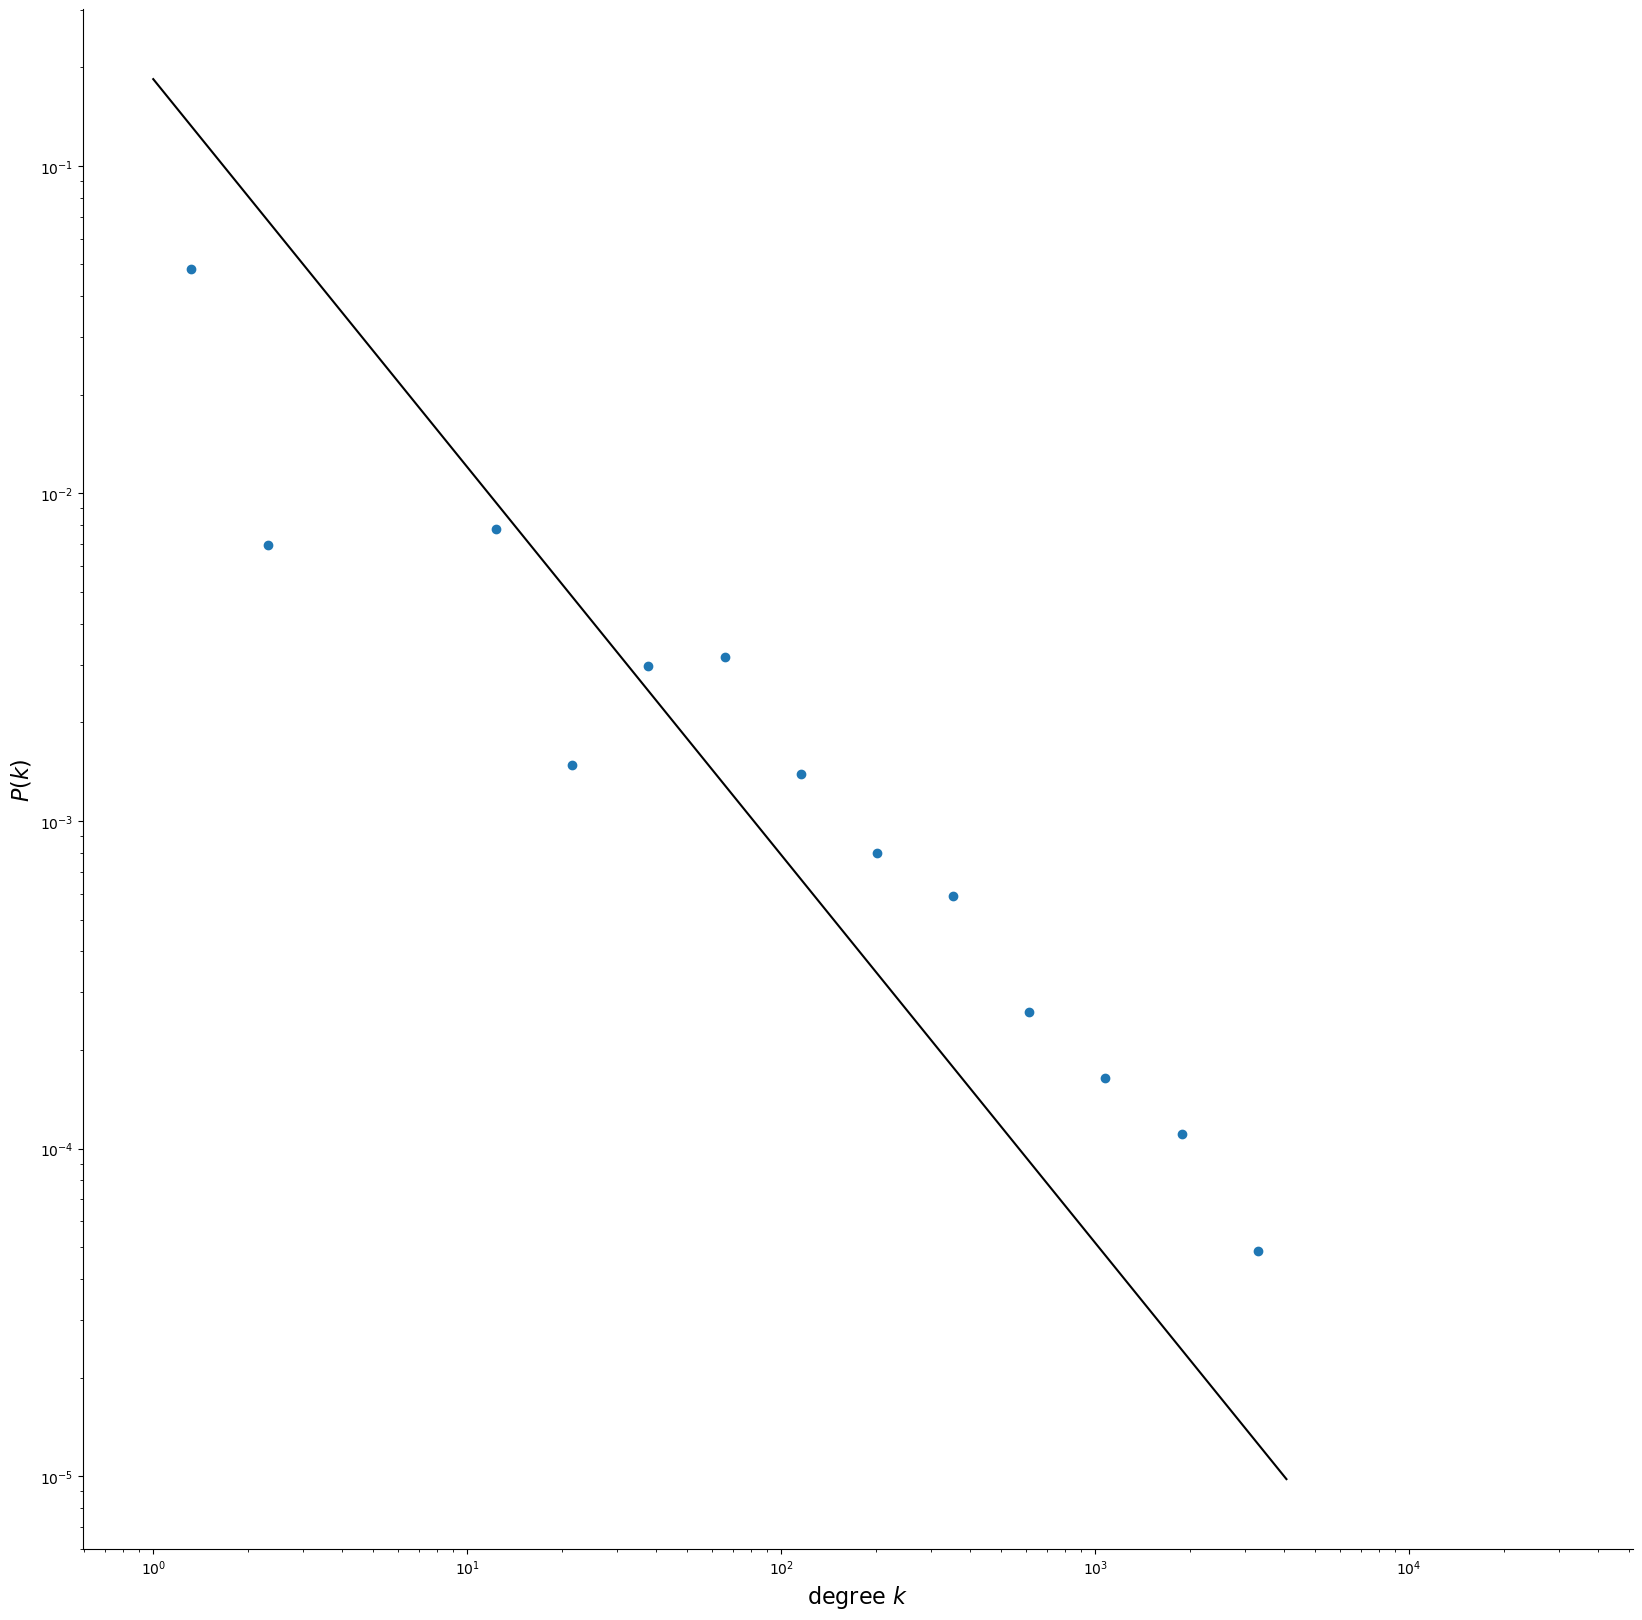

In [164]:
degrees = [G.degree(n, weight = 'weight') for n in G.nodes()]
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print()
print("Weighted average degree:", np.mean(degrees))
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))
print()
plot_degree_dist(G)

In [165]:
print("Unweighted average Clustering Coefficient: ", np.mean(list(nx.clustering(G).values())))

print("Weighted average clustering coefficient: ", nx.average_clustering(G, weight='weight'))

print("Number of connected components: ", nx.number_connected_components(G))

print("Average shortest path length: ", nx.average_shortest_path_length(G))

Unweighted average Clustering Coefficient:  0.8389847856019887
Weighted average clustering coefficient:  0.02026116735849747
Number of connected components:  1
Average shortest path length:  1.4141784820683903


[1.00000000e+00 1.74811857e+00 3.05591852e+00 5.34210791e+00
 9.33863801e+00 1.63250465e+01 2.85381169e+01 4.98880120e+01
 8.72101600e+01 1.52453700e+02 2.66507143e+02 4.65886085e+02
 8.14424115e+02 1.42370992e+03 2.48881374e+03 4.35074150e+03
 7.60561200e+03 1.32955115e+04 2.32421306e+04 4.06300000e+04]
[4.86067824e-02 6.95129943e-03 0.00000000e+00 0.00000000e+00
 7.80736693e-03 2.23307706e-03 3.40644637e-03 2.67937419e-03
 1.39338073e-03 1.03619685e-03 5.01557482e-04 3.12995713e-04
 1.19364792e-04 1.19493259e-04 4.39427261e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
gamma=  1.1863352777674352
[1.00000000e+00 1.74818648e+00 3.05615596e+00 5.34273052e+00
 9.34008925e+00 1.63282177e+01 2.85447694e+01 4.99015799e+01
 8.72372672e+01 1.52507011e+02 2.66610694e+02 4.66085210e+02
 8.14803861e+02 1.42442909e+03 2.49016768e+03 4.35327746e+03
 7.61034079e+03 1.33042949e+04 2.32583884e+04 4.06600000e+04]
[4.86023705e-02 6.95039847e-03 0.00000000e+00 0.00000000e+00
 7.805445

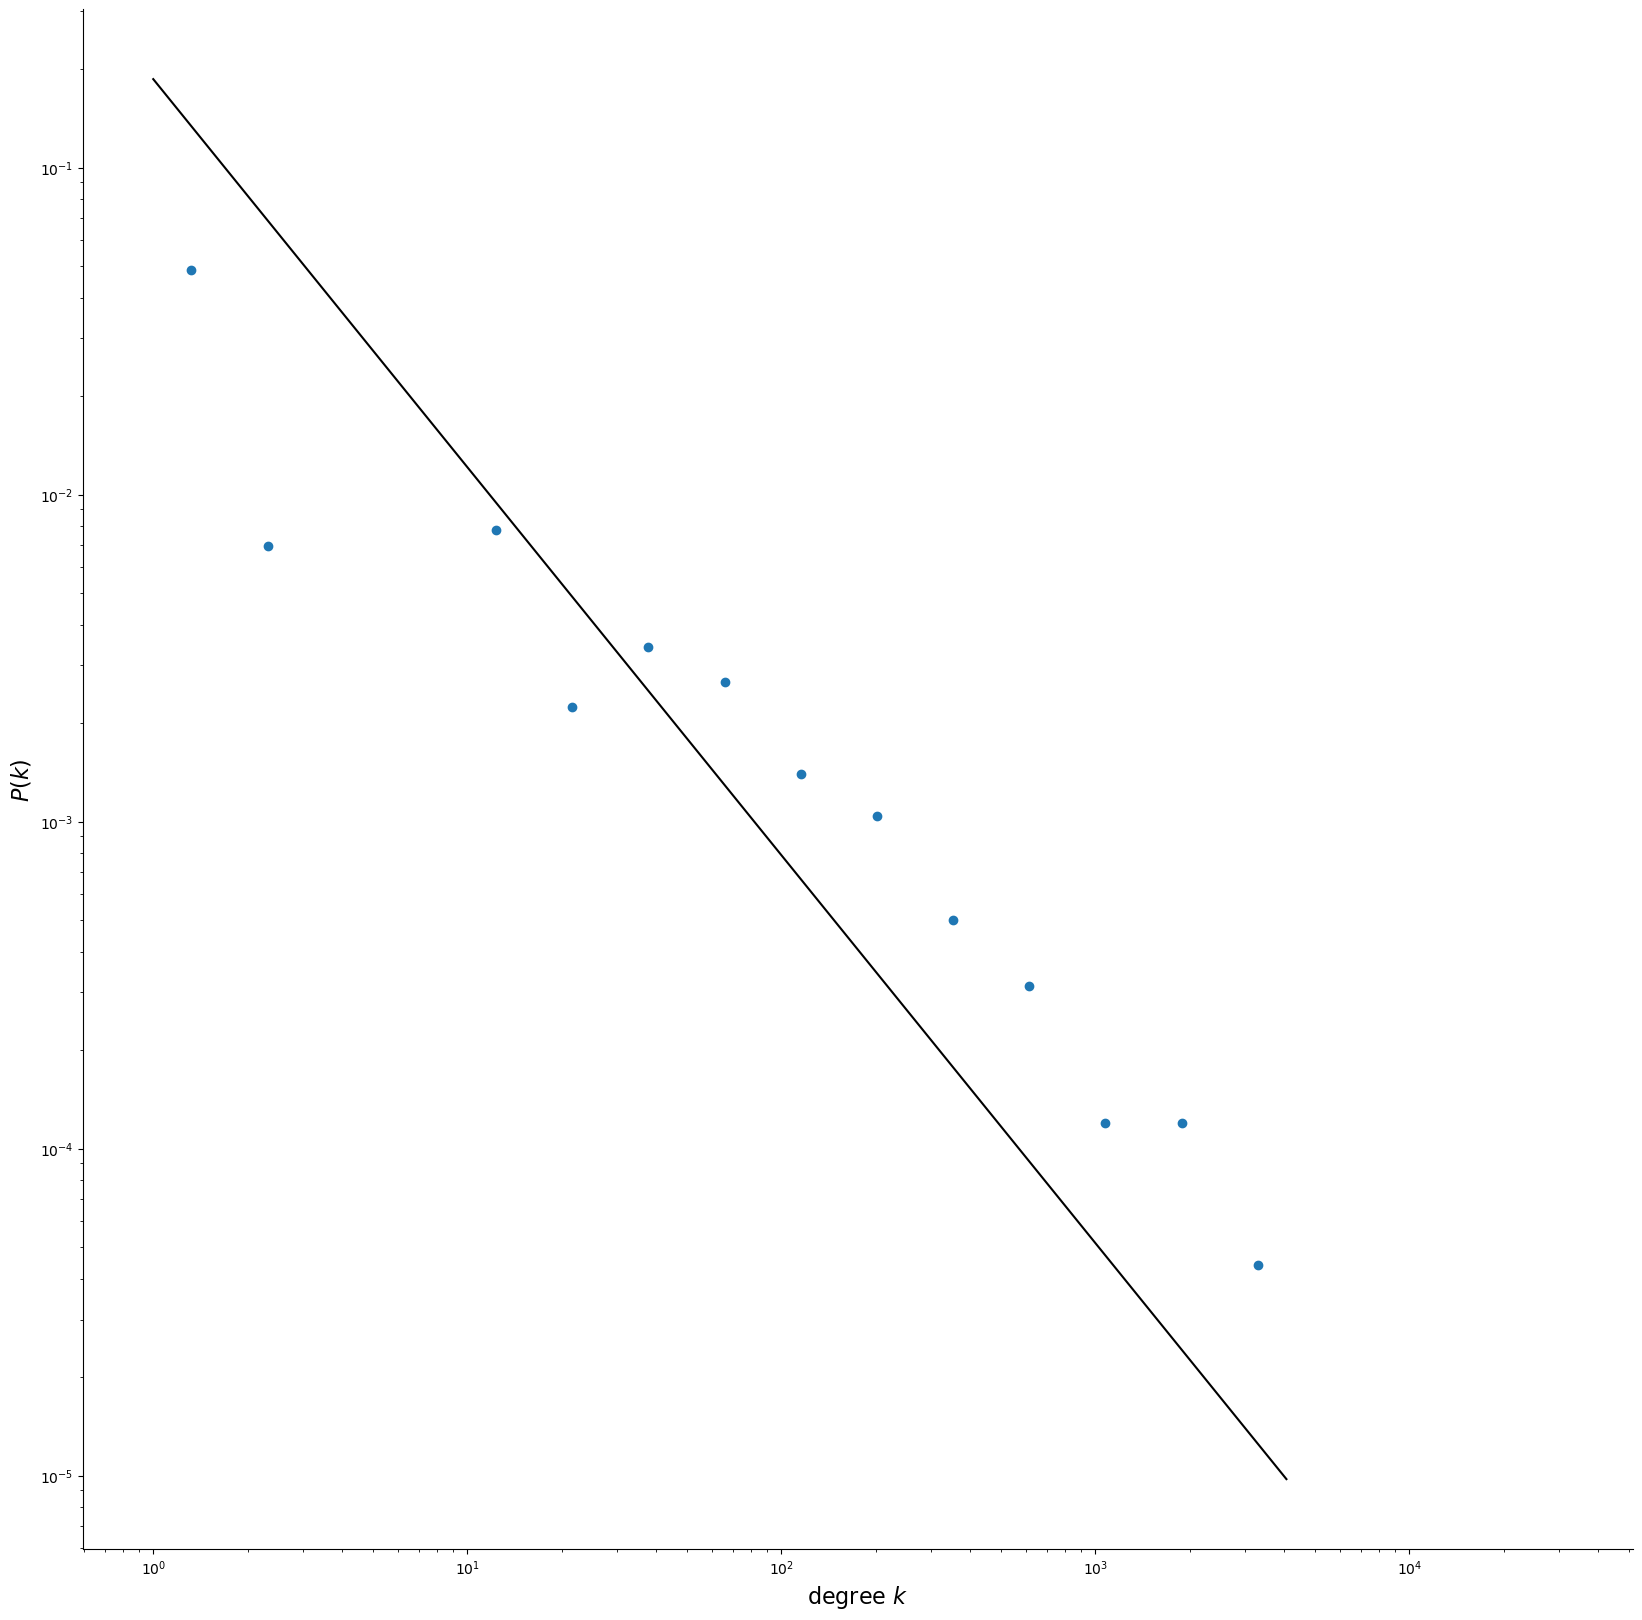

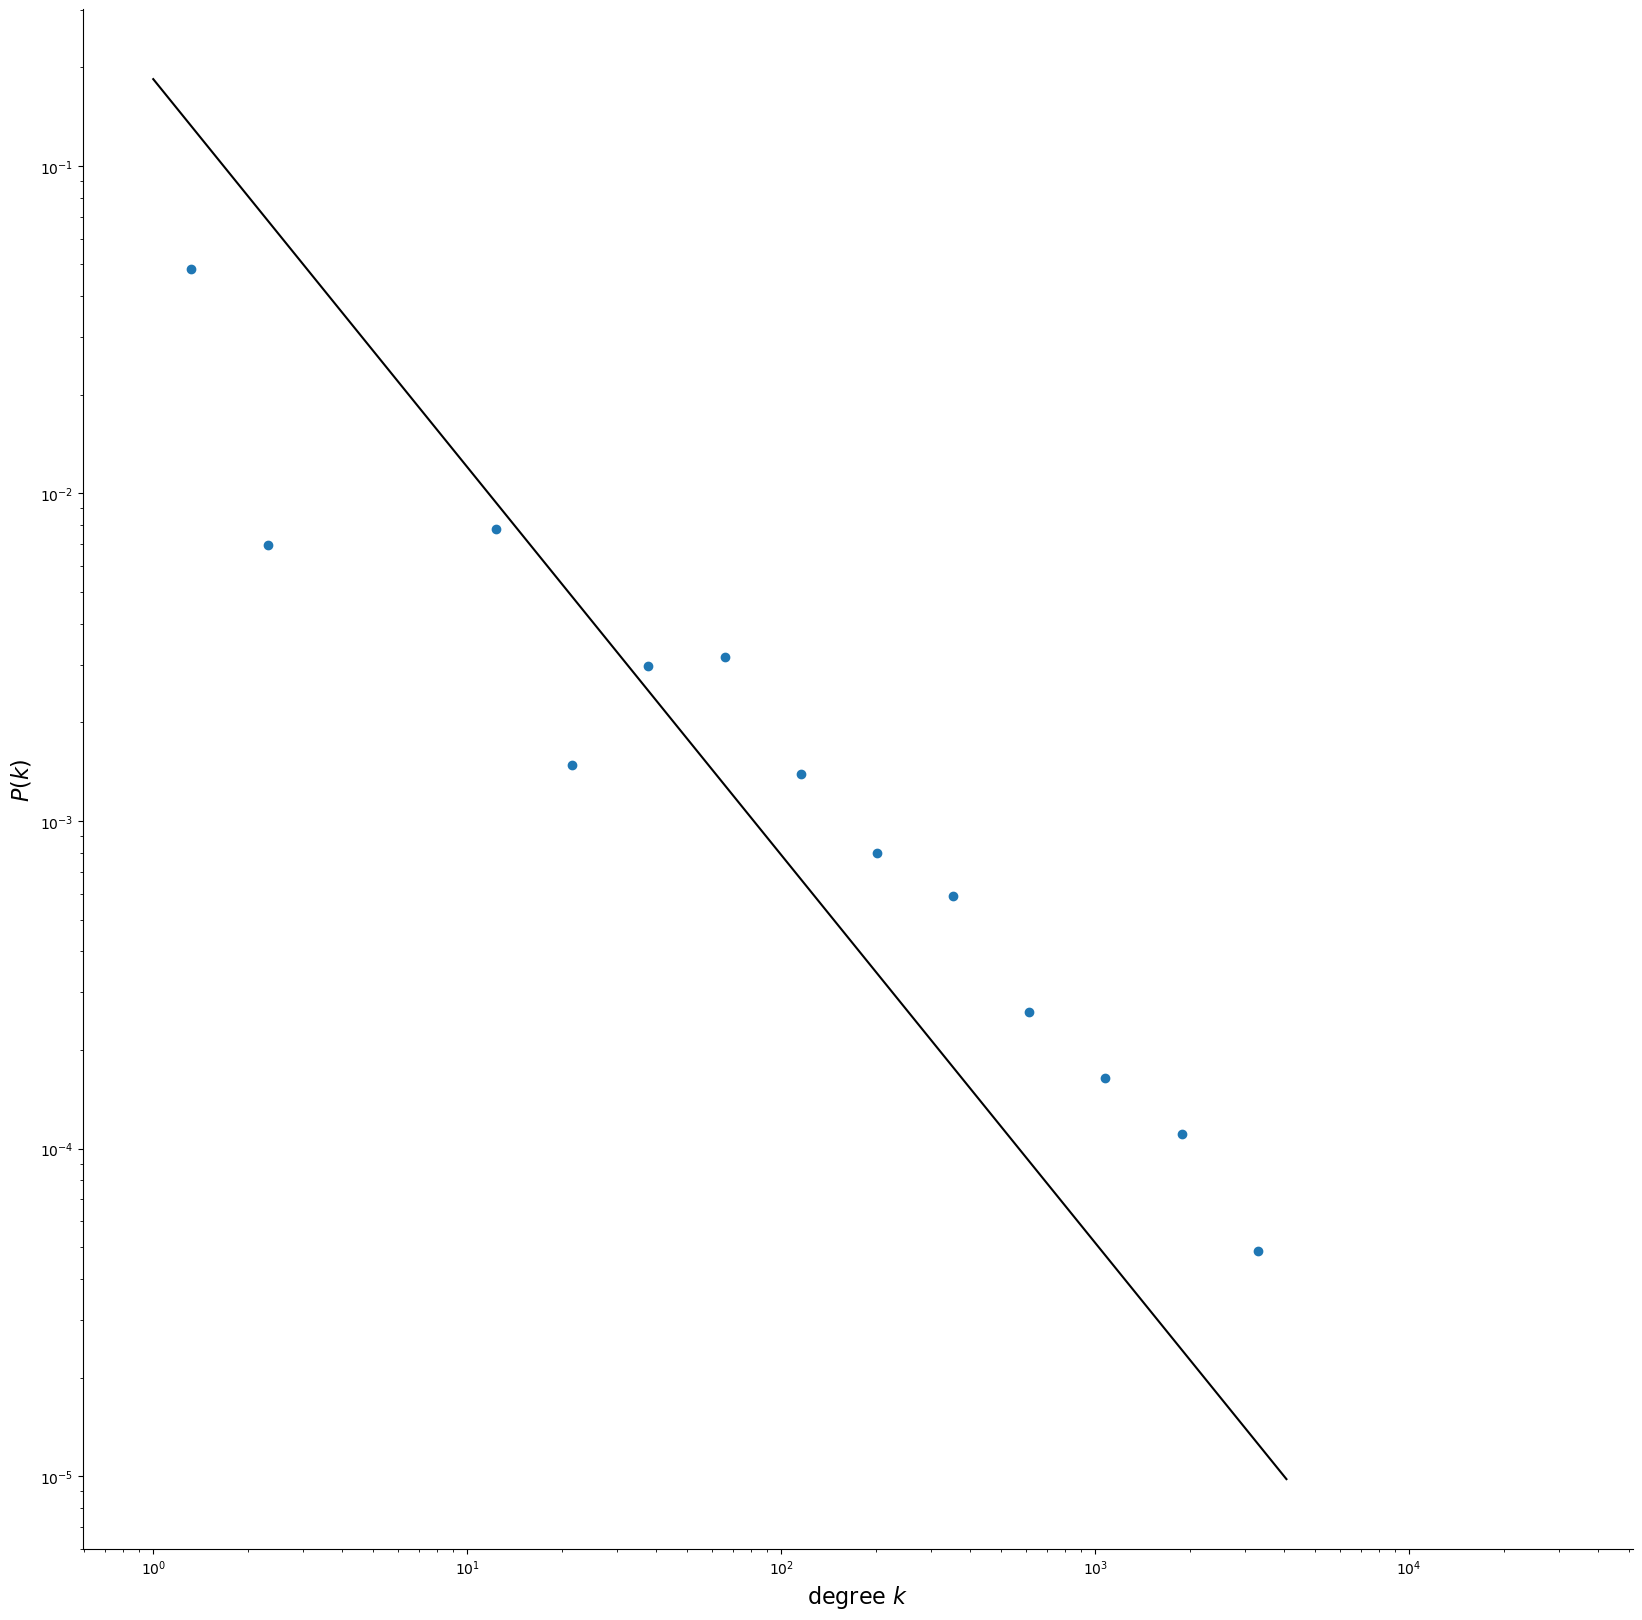

In [166]:
DP = G.copy() # the function edits the graph in place

nx.connected_double_edge_swap(DP,nswap=10*G.number_of_edges())
plot_degree_dist(DP)
plot_degree_dist(G)

In [168]:
clustering_DP = []
short_path_DP = []

for i in range(1000): # 1000 is better
    nx.connected_double_edge_swap(DP,nswap=G.number_of_edges())
    
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))

0.8248096733969846
0.0008759577584843773
1.4119739783152627
0.0033862756873652357
